In [ ]:
# # valid
# # 639 (1,)
# # 774 (1,)
# # 788 (1,)

# #test
# # 28 (1,)
# for idx, train_data in enumerate(train_dataset):
#   # if train_data['image'] is None:
#   # if train_data['image'].shape != (3, 256, 256):
#   #   print(idx, train_data['image'].shape)

#   # if train_data['mask'].shape != (1, 256, 256):
#   #   print(idx, train_data['mask'].shape)
#   continue
  


In [9]:
import os
import json
import matplotlib.pyplot as plt

def compare_approaches(json_files, metric_name):
    approaches_data = {}

    for file in json_files:
        with open(file) as f:
            approach_name = os.path.splitext(os.path.basename(file))[0]
            data = json.load(f)
            approach_metrics = {}
            # print(data)
            for epoch in data.keys():
                metrics = data[epoch]
                # print(metrics.keys())
                if metric_name in metrics:
                    approach_metrics[epoch] = metrics[metric_name]

            approaches_data[approach_name] = approach_metrics

    return approaches_data

In [21]:
mode = 'val'
if mode == 'train':
    metric_names = ['train_per_image_iou', 'train_dataset_iou', 'train_average_loss', 'train_f1_score', 'train_accuracy', 'train_precision', 'train_recall', 'train_sensitivity', 'train_specificity', 'train_balanced_accuracy']
else:
    metric_names = ['valid_per_image_iou', 'valid_dataset_iou', 'valid_average_loss', 'valid_f1_score', 'valid_accuracy', 'valid_precision', 'valid_recall', 'valid_sensitivity', 'valid_specificity', 'valid_balanced_accuracy']


apps = ['FPN', "PSPNet", "Unet", "DeepLabV3"]
json_files = []
for app in apps:
    p = f'.\\t2\\{app}\\{mode}-{app}.json'
    json_files.append(p)
# json_files = ['./Unet/train-Unet.json', './PSPNet/train-PSPNet.json']
json_files

['.\\t2\\FPN\\val-FPN.json',
 '.\\t2\\PSPNet\\val-PSPNet.json',
 '.\\t2\\Unet\\val-Unet.json',
 '.\\t2\\DeepLabV3\\val-DeepLabV3.json']

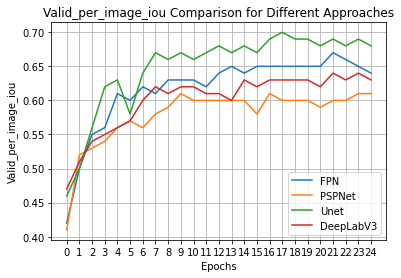

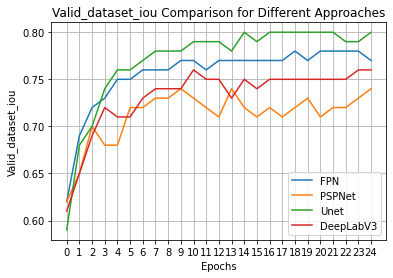

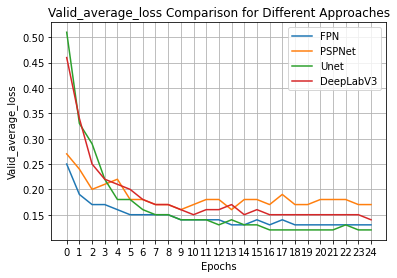

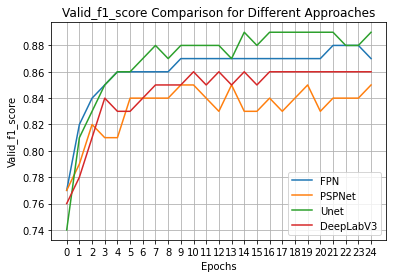

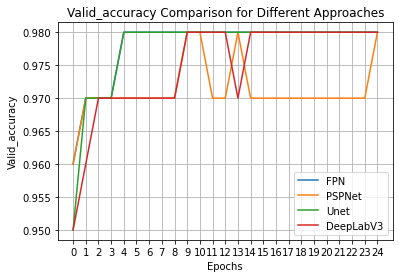

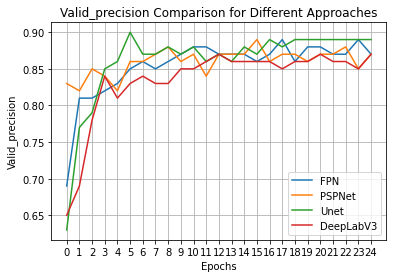

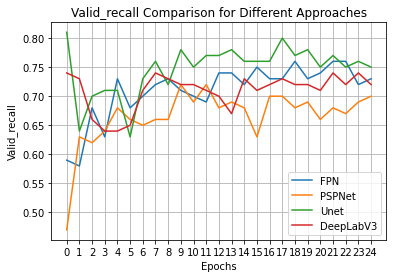

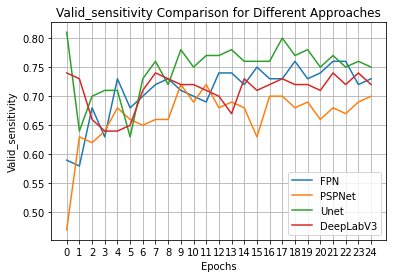

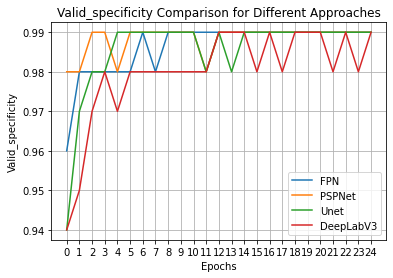

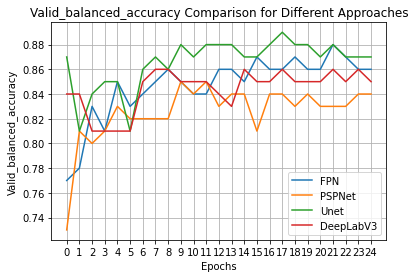

In [22]:
for metric_name in metric_names:
    approaches_metrics = compare_approaches(json_files, metric_name)
    for approach_name, approach_metrics in approaches_metrics.items():
        x_values = []
        y_values = []
        # print(approach_metrics)
        for epoch, metric_value in approach_metrics.items():
            x_values.append(epoch)
            # print(metric_value)
            y_values.append(metric_value)

        plt.plot(x_values, y_values, label=approach_name.split('-')[1])

    plt.xlabel('Epochs')
    plt.ylabel(metric_name.capitalize())
    plt.title(f'{metric_name.capitalize()} Comparison for Different Approaches')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{metric_name}")
    plt.show()
